In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from nilearn.plotting import plot_design_matrix

%load_ext autoreload
%autoreload 2
from dd_kable_analysis.config_loader import load_config
from dd_kable_analysis.tseries_model.design_matrix import (
    get_confounds,
    get_frametimes,
    make_design_matrix,
)
from dd_kable_analysis.tseries_model.tseries_model_qa import make_design_qa_figure

In [ ]:
cfg = load_config()

# What is this?
Here I'm developing some code for generating the design matrices and running the beta series models


Note: What Josh wants for confounds = "I'd typically include xyz, squares and derivatives"


Below I illustrate different functions that were creates for the purposes of modeling and running QA on the design matrix.

### filename structure for later

sub-SUBNUM_ses-scan1_task-itc_run-RUNNUM_contrast-trial0_output-effectsize.nii.gz

In [3]:
good_subs_csv = cfg.subject_lists / 'initial_qa_pass_subjects_runs.csv'
good_subs = pd.read_csv(good_subs_csv)

In [4]:
good_subs.shape

(454, 3)

In [5]:
entry_num = 0
sub_id = good_subs['sub_id'][entry_num]
run = good_subs['run'][entry_num]
print(f'Subject: {sub_id}')

Subject: dmp0011


### Main functions for pulling out confounds, creating frame_times, making the design matrix, making the contrasts and generating the design matrix QA figure

Note the regex for the confound we use are set in the `config.yaml`.

In [6]:
selected_confounds = get_confounds(cfg, sub_id, run)
print(selected_confounds.head())

   cosine00  cosine01  cosine02     rot_x  rot_x_derivative1     rot_y  \
0  0.138659  0.138612  0.138533 -0.000950           0.000000  0.000301   
1  0.138533  0.138106  0.137396 -0.001049          -0.000099  0.000287   
2  0.138280  0.137096  0.135131 -0.001290          -0.000241  0.000223   
3  0.137901  0.135586  0.131758 -0.000227           0.001063  0.000123   
4  0.137396  0.133582  0.127303  0.000242           0.000469  0.000457   

   rot_y_derivative1     rot_z  rot_z_derivative1  
0           0.000000 -0.000710       0.000000e+00  
1          -0.000014 -0.000710       8.373965e-09  
2          -0.000065  0.000343       1.053493e-03  
3          -0.000100 -0.000507      -8.501296e-04  
4           0.000334  0.000297       8.039306e-04  


In [7]:
frame_times = get_frametimes(cfg, sub_id, run)
print(frame_times)

[  0.   3.   6.   9.  12.  15.  18.  21.  24.  27.  30.  33.  36.  39.
  42.  45.  48.  51.  54.  57.  60.  63.  66.  69.  72.  75.  78.  81.
  84.  87.  90.  93.  96.  99. 102. 105. 108. 111. 114. 117. 120. 123.
 126. 129. 132. 135. 138. 141. 144. 147. 150. 153. 156. 159. 162. 165.
 168. 171. 174. 177. 180. 183. 186. 189. 192. 195. 198. 201. 204. 207.
 210. 213. 216. 219. 222. 225. 228. 231. 234. 237. 240. 243. 246. 249.
 252. 255. 258. 261. 264. 267. 270. 273. 276. 279. 282. 285. 288. 291.
 294. 297. 300. 303. 306. 309.]


### The singular error occurs even if I only model the beta series
I'm not too worried about this since I'll be inspecting the cVIFs for our contrasts and further checking for outliers

/oak/stanford/groups/russpold/users/buckholtz/DD_Kable/scripts/dd-kable-analysis/src/dd_kable_analysis/tseries_model/design_matrix.py:133: UserWarning: Matrix is singular at working precision, regularizing...
  desmat = make_first_level_design_matrix(


(104, 41)


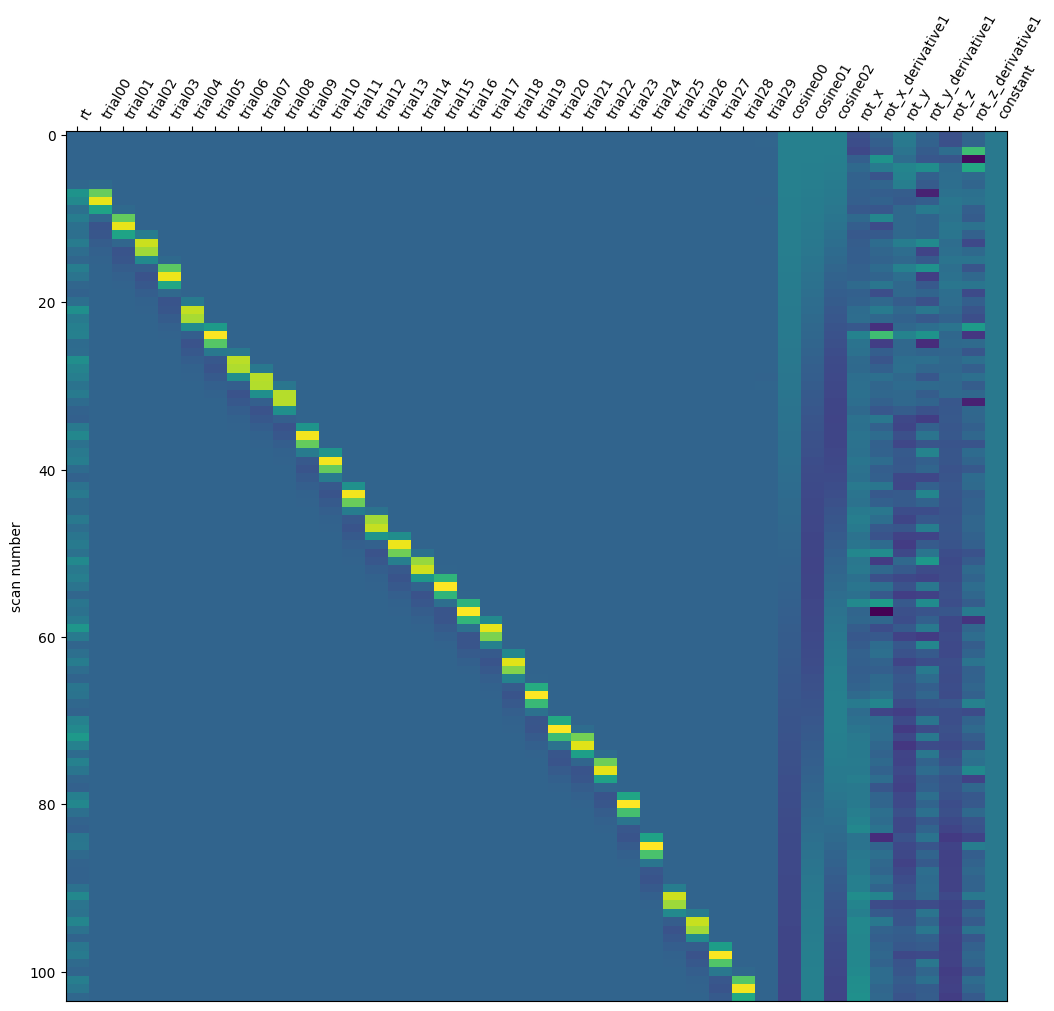

In [8]:
behav_data, events_data, desmat = make_design_matrix(cfg, sub_id, run)
print(desmat.shape)

plot_design_matrix(desmat)
plt.show()

### Huh, the task doesn't start for while (for this subject)
I sort of wondered if there were possibly warmup scans that we had to remove (and then adjust the onset files).  I looked at one subject's run and the early scans are not noisy, so I think the data are fine...they just took a moment to actually start doing the task, I guess.  I'll visually inspect all design matrices later and I also need to go through the fmriprep html files to better undrestand the data and for the purposes of QA.  I'll do that on globus later.

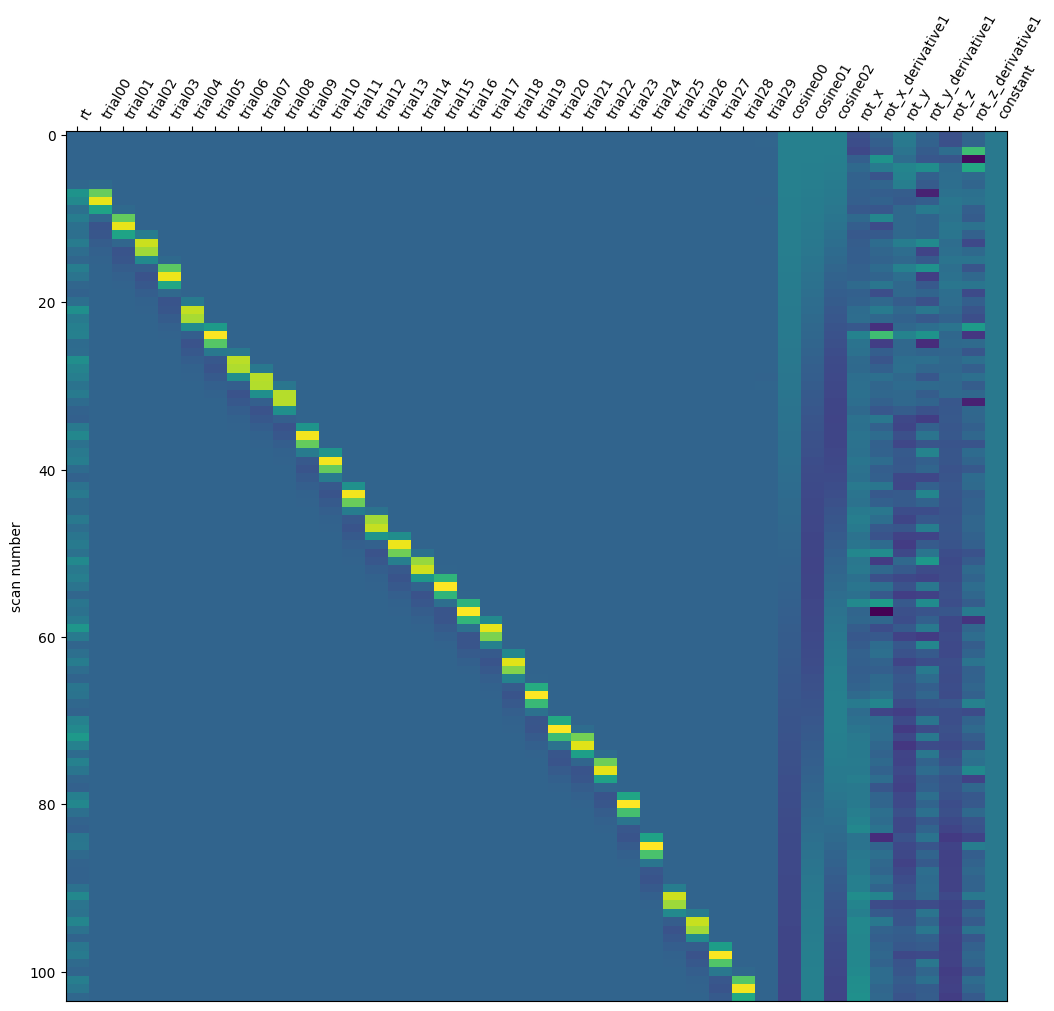

In [9]:
plot_design_matrix(desmat)
plt.show()

/oak/stanford/groups/russpold/users/buckholtz/DD_Kable/scripts/dd-kable-analysis/src/dd_kable_analysis/tseries_model/design_matrix.py:133: UserWarning: Matrix is singular at working precision, regularizing...
  desmat = make_first_level_design_matrix(


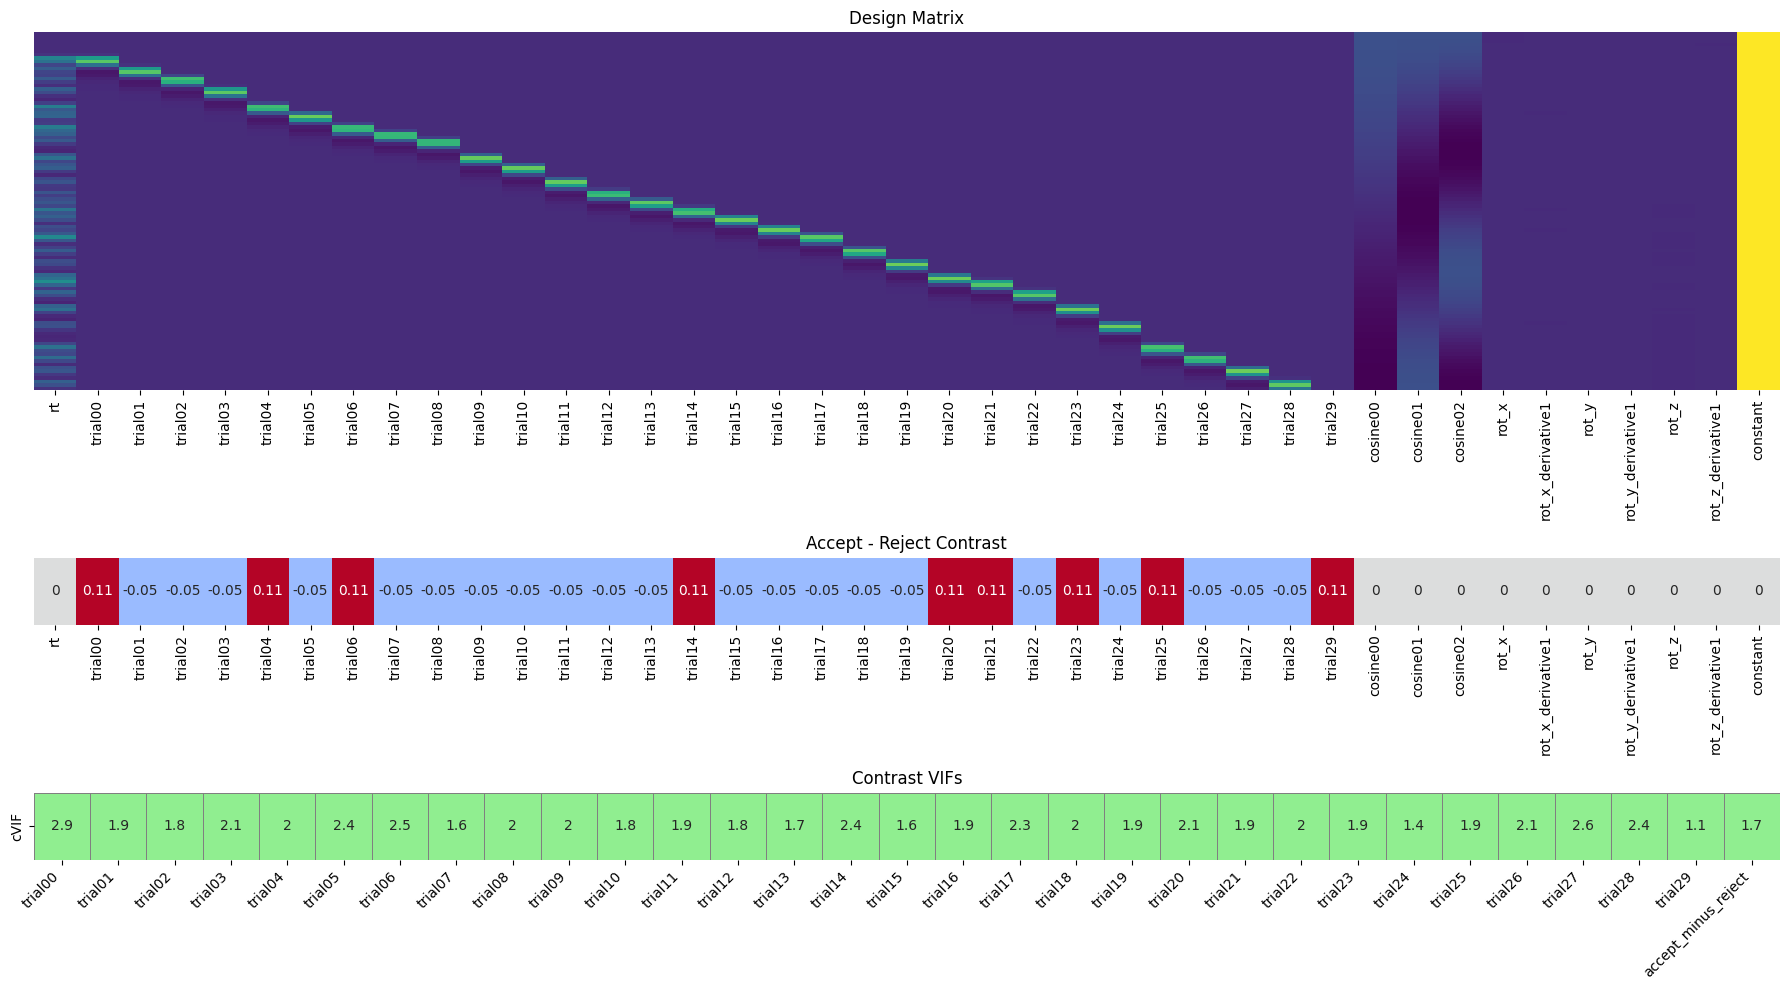

In [10]:
fig_out = make_design_qa_figure(cfg, sub_id, run, show=True)